In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#replacing blanks with 0 as tenure is 0 and no total chargers are recorded

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

In [14]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)
        

#coverted 0 and 1 value of senior citizen to yes/no to make it easier to understand

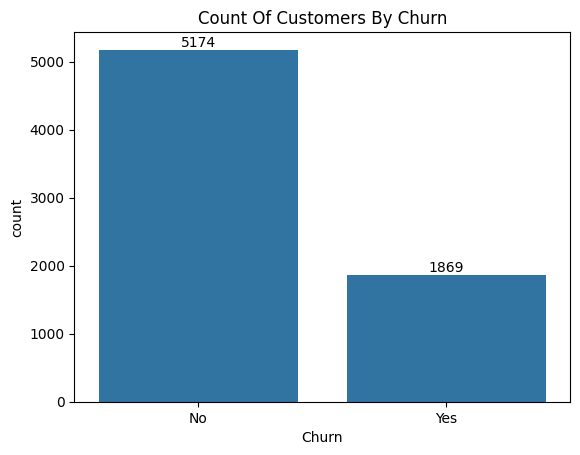

In [27]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn")
plt.show()

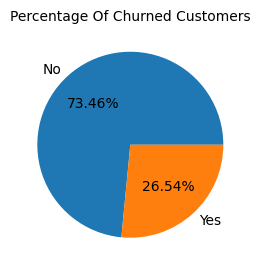

In [26]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage Of Churned Customers",fontsize=10)
plt.show()

#from the given pir chart we can conclude that 26.54% of our customers have churned  out.
#now let's explore the reason behind it

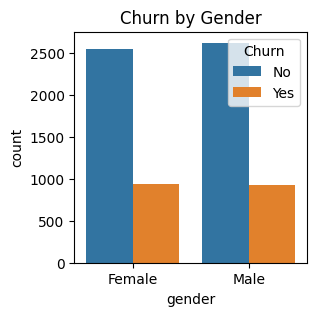

In [32]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

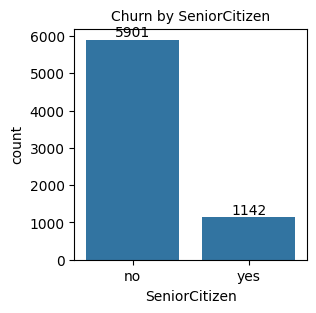

In [38]:
plt.figure(figsize=(3,3))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen",fontsize=10)

plt.show()

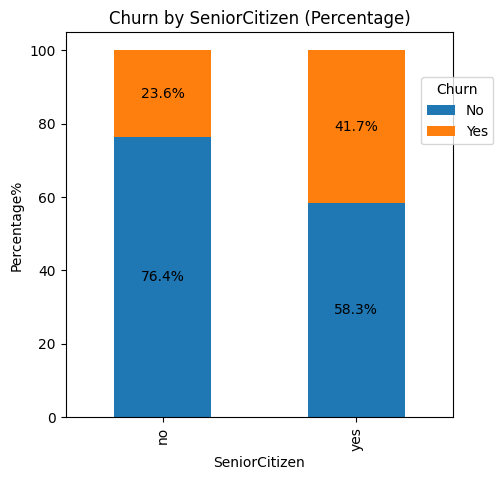

In [39]:
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Create the stacked bar plot
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(5, 5), color=['#1f77b4', '#ff7f0e'])

# Add percentages on top of each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center')

plt.title("Churn by SeniorCitizen (Percentage)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage%")
plt.legend(title="Churn", bbox_to_anchor=(0.9,0.9))

plt.show()

#comparatively a greater % of people in senior citizen category have churned 

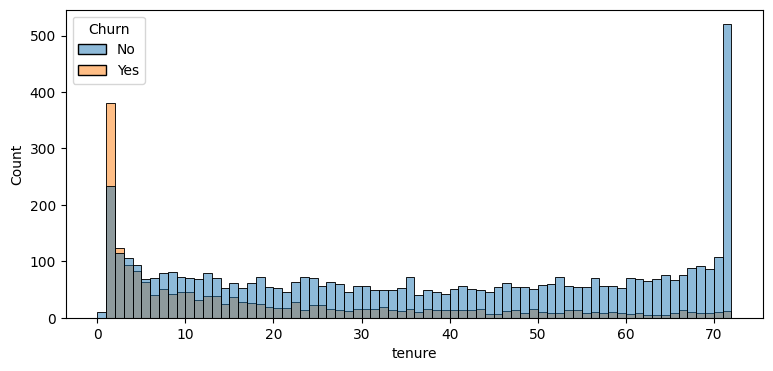

In [46]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

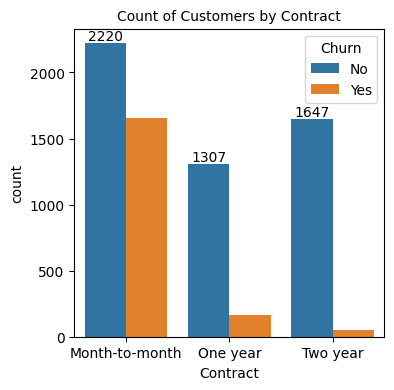

In [52]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract",fontsize=10)

plt.show()

#people who have month to month ccontract are likely to churn then from those who have 1 or 2 years of contract

In [53]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

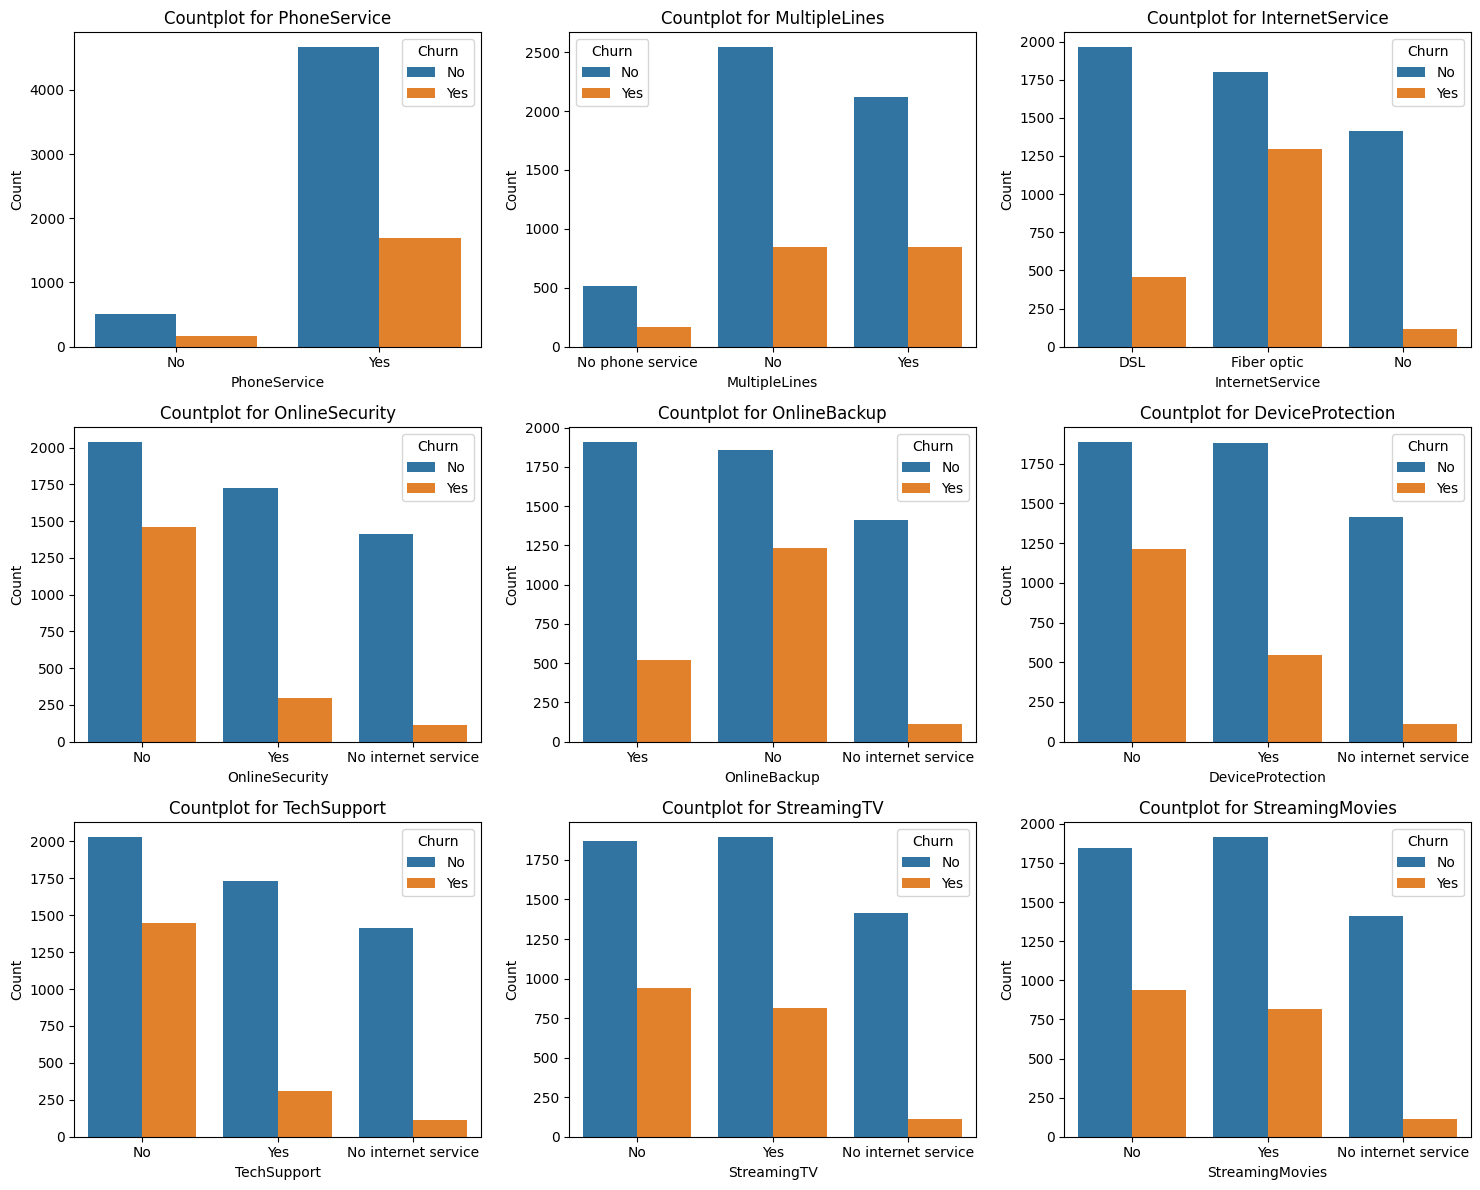

In [55]:


# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure and subplots with a grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and corresponding subplot axis
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


# In general, customers with specific services such as OnlineSecurity, TechSupport, and DeviceProtection who did not subscribe to these services have a higher churn rate. For services like PhoneService, churn is relatively low for customers who subscribed. The data suggests that lacking additional services might be correlated with a higher churn rate across the various categories.

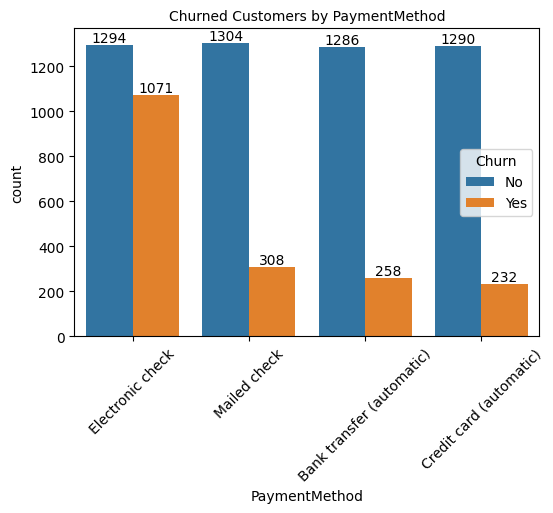

In [60]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by PaymentMethod",fontsize=10)
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when is using electronic check as a payment method